# Plots

In [94]:
from matplotlib import pyplot as plt
from typing import Dict, Tuple
import numpy as np
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FuncFormatter

plt.style.use('plt_style.txt')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colormap = {'FGSM': colors[0], 'PGD': colors[1], 'S-FGSM': colors[2], 'S-PGD': colors[3]}

### Granularity

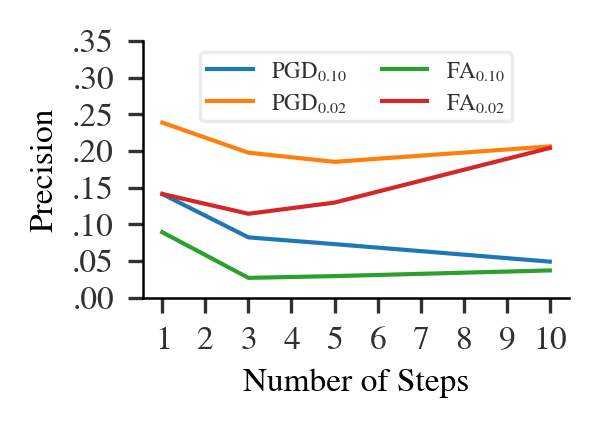

In [125]:
'''
key format = loss_fn, steps, epsilon
params = [ (loss_fn, steps, epsilon)
    for loss_fn in ['l1', 'selective'] 
    for epsilon in [1/10, 1/50]
    for steps in [1, 3, 5, 10] 
]'''
# ssd
# granularity_data = {('l1', 1, 0.1): 0.48000469755622355, ('l1', 3, 0.1): 0.4933416537406225, ('l1', 5, 0.1): 0.440384693122283, ('l1', 10, 0.1): 0.44943103624991104, ('l1', 1, 0.02): 0.6859845093934132, ('l1', 3, 0.02): 0.6605602125392417, ('l1', 5, 0.02): 0.617218675207466, ('l1', 10, 0.02): 0.619299189446706, ('selective', 1, 0.1): 0.3457165416471404, ('selective', 3, 0.1): 0.23011424090425459, ('selective', 5, 0.1): 0.16158887352277804, ('selective', 10, 0.1): 0.1660643857706281, ('selective', 1, 0.02): 0.45058114733366317, ('selective', 3, 0.02): 0.5042841052568828, ('selective', 5, 0.02): 0.4487580422451335, ('selective', 10, 0.02): 0.4518706824704377}

# frcnn
granularity_data = {('l1', 1, 0.1): 0.14112058272131758, ('l1', 3, 0.1): 0.08203656917386384, ('l1', 5, 0.1): 0.07281498517659804, ('l1', 10, 0.1): 0.04894273711433147, ('l1', 1, 0.02): 0.2385446840030747, ('l1', 3, 0.02): 0.19749213852173855, ('l1', 5, 0.02): 0.18504676456426883, ('l1', 10, 0.02): 0.2060983347886643, ('selective', 1, 0.1): 0.08907545898492718, ('selective', 3, 0.1): 0.026812255356727845, ('selective', 5, 0.1): 0.029211885395577973, ('selective', 10, 0.1): 0.036954373884075346, ('selective', 1, 0.02): 0.14122894239928338, ('selective', 3, 0.02): 0.11422197961754546, ('selective', 5, 0.02): 0.12945134771476655, ('selective', 10, 0.02): 0.20396236304564416}
steps_idx = {1:0, 3:1, 5:2, 10:3}

w = 5.5 / 3
golden = 1.618
fig, ax = plt.subplots(figsize=(w, w / golden))
plots = {}

# aggregate results
for key in granularity_data:
    loss_fn, steps, epsilon = key
    method = 'FA' if loss_fn == 'selective' else 'PGD'
    name = f'{method}$_{{{epsilon:.2f}}}$'

    if name not in plots:
        plots[name] = [0] * len(steps_idx)

    plots[name][steps_idx[steps]] = granularity_data[key]


for i, model in enumerate(plots):
    plt.plot(steps_idx.keys(), plots[model], label=model, color=colors[i])


ax.yaxis.set_major_formatter(FuncFormatter(lambda p,_ : f'{p:.2f}'[1:]))

plt.ylabel('Precision'); plt.xlabel('Number of Steps')
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 0.36, 0.05))
plt.legend(loc='upper center', ncol=2, fancybox=True, fontsize=5.5)
# fig.savefig('results/granularity.pdf', bbox_inches='tight', pad_inches=0)
# plt.title('Threshold = 0.01')
plt.show();

## Epsilon - Sphere

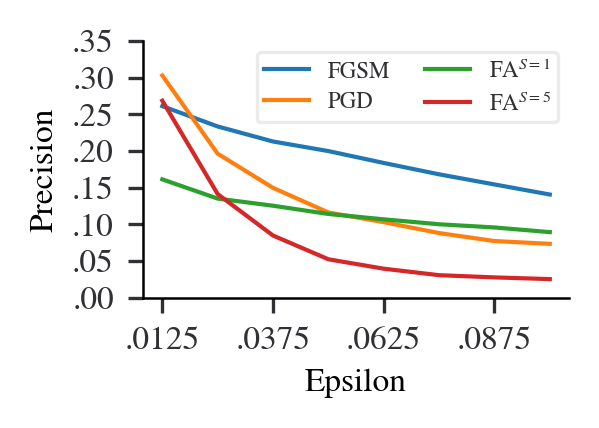

In [108]:
'''
# key = loss_fn, steps, epsilon
params = [ (loss_fn, steps, epsilon)
    for loss_fn in ['l1', 'selective']  
    for epsilon in np.arange(0.0125, 0.101, 0.0125)
    for steps in [1, 5]  
]'''
# ssd
# epsilon_data = {('l1', 1, 0.0125): 0.23956523216831016, ('l1', 5, 0.0125): 0.23517860212129502, ('l1', 1, 0.025): 0.2198413949026522, ('l1', 5, 0.025): 0.20346247597425196, ('l1', 1, 0.037500000000000006): 0.20551035858936081, ('l1', 5, 0.037500000000000006): 0.18719932815969606, ('l1', 1, 0.05): 0.19205961252693432, ('l1', 5, 0.05): 0.16887228981789043, ('l1', 1, 0.0625): 0.18104334963403992, ('l1', 5, 0.0625): 0.16290905350931886, ('l1', 1, 0.075): 0.16937718133148033, ('l1', 5, 0.075): 0.14309231683525675, ('l1', 1, 0.08750000000000001): 0.15861490406857617, ('l1', 5, 0.08750000000000001): 0.14135033217473397, ('l1', 1, 0.1): 0.1442887934758087, ('l1', 5, 0.1): 0.1306817261501141, ('selective', 1, 0.0125): 0.14303497213958782, ('selective', 5, 0.0125): 0.23300181266794523, ('selective', 1, 0.025): 0.11906547128852392, ('selective', 5, 0.025): 0.16814295761327422, ('selective', 1, 0.037500000000000006): 0.11200895664970194, ('selective', 5, 0.037500000000000006): 0.15320748631403205, ('selective', 1, 0.05): 0.11203991953837862, ('selective', 5, 0.05): 0.10917686684190366, ('selective', 1, 0.0625): 0.11209775452592909, ('selective', 5, 0.0625): 0.09812428070462911, ('selective', 1, 0.075): 0.1040193428009504, ('selective', 5, 0.075): 0.09224463181098663, ('selective', 1, 0.08750000000000001): 0.10057587647689208, ('selective', 5, 0.08750000000000001): 0.08517709686527855, ('selective', 1, 0.1): 0.09396338215700689, ('selective', 5, 0.1): 0.07765165403697859}

# frcnn
epsilon_data = {('l1', 1, 0.0125): 0.2610616836326749, ('l1', 5, 0.0125): 0.30288166835423025, ('l1', 1, 0.025): 0.2333429904614117, ('l1', 5, 0.025): 0.19620411712033345, ('l1', 1, 0.037500000000000006): 0.21280897334890758, ('l1', 5, 0.037500000000000006): 0.14958786777269148, ('l1', 1, 0.05): 0.19976296463470325, ('l1', 5, 0.05): 0.11604116719582987, ('l1', 1, 0.0625): 0.18356238690367335, ('l1', 5, 0.0625): 0.10281715930727792, ('l1', 1, 0.075): 0.1680623278005409, ('l1', 5, 0.075): 0.0879306138014952, ('l1', 1, 0.08750000000000001): 0.1542645631867448, ('l1', 5, 0.08750000000000001): 0.07705942039886213, ('l1', 1, 0.1): 0.14051193801719752, ('l1', 5, 0.1): 0.07326406004153871, ('selective', 1, 0.0125): 0.1611656643746777, ('selective', 5, 0.0125): 0.2684504775576304, ('selective', 1, 0.025): 0.13496475069067954, ('selective', 5, 0.025): 0.1411491130747048, ('selective', 1, 0.037500000000000006): 0.1252182831529849, ('selective', 5, 0.037500000000000006): 0.08459518107910977, ('selective', 1, 0.05): 0.1139908846362351, ('selective', 5, 0.05): 0.05219425845326645, ('selective', 1, 0.0625): 0.10668323815580096, ('selective', 5, 0.0625): 0.03936162397196825, ('selective', 1, 0.075): 0.09994644467346478, ('selective', 5, 0.075): 0.03050446025801265, ('selective', 1, 0.08750000000000001): 0.0955911895395066, ('selective', 5, 0.08750000000000001): 0.02748972543325359, ('selective', 1, 0.1): 0.08921274261951055, ('selective', 5, 0.1): 0.02516477871738585}
epsilons = np.arange(0.0125, 0.101, 0.0125)
eps_id = lambda x : np.where(epsilons == x)[0][0]

fig, ax = plt.subplots(figsize=(w, w / golden))
plots = {}

# aggregate results
for key in epsilon_data:
    loss_fn, steps, epsilon = key

    if loss_fn == 'selective':
        name = f'FA$^{{S={steps}}}$'
    else: 
        name = 'FGSM' if steps == 1 else 'PGD'

    if name not in plots:
        plots[name] = [0] * len(epsilons)

    plots[name][eps_id(epsilon)] = epsilon_data[key]


for i, model in enumerate(plots):
    plt.plot(epsilons, plots[model], label=model, color=colors[i])

ax.xaxis.set_major_formatter(FuncFormatter(lambda p,_ : f'{p:.4f}'[1:]))
ax.yaxis.set_major_formatter(FuncFormatter(lambda p,_ : f'{p:.2f}'[1:]))

plt.ylabel('Precision'); plt.xlabel('Epsilon')
plt.xticks(epsilons[::2])
plt.yticks(np.arange(0, 0.36, 0.05))
plt.legend(loc='upper right', ncol=2, fancybox=True, fontsize=5.5)
# fig.savefig('results/epsilons.pdf', bbox_inches='tight', pad_inches=0)
plt.show();

## Focusing Threshold

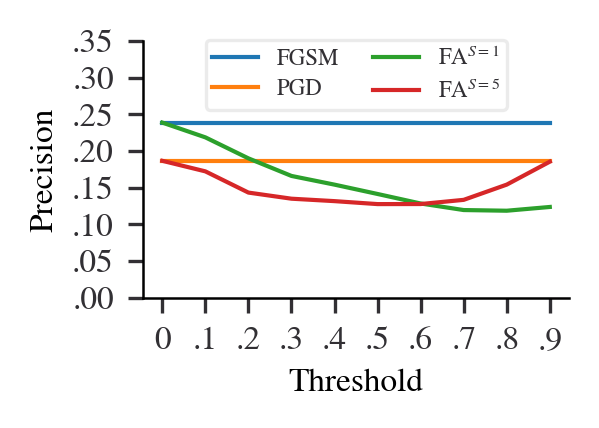

In [120]:
'''
# key = loss_fn, steps, threshold
params = [ (loss_fn, steps, threshold)
    for loss_fn in ['l1', 'selective']  
    for threshold in np.arange(0, 0.99, 0.1)
    for steps in [1, 5]  
]'''
# ssd
# threshold_data = {('selective', 1, 0.0): 0.23066128552115187, ('selective', 5, 0.0): 0.20512701874160783, ('selective', 1, 0.1): 0.10866471535857831, ('selective', 5, 0.1): 0.09238662038793477, ('selective', 1, 0.2): 0.10792264020612533, ('selective', 5, 0.2): 0.12224354507082301, ('selective', 1, 0.30000000000000004): 0.11070843875690584, ('selective', 5, 0.30000000000000004): 0.13359095071056853, ('selective', 1, 0.4): 0.11956006810634272, ('selective', 5, 0.4): 0.15031052778355428, ('selective', 1, 0.5): 0.12302303512247648, ('selective', 5, 0.5): 0.16428598497434813, ('selective', 1, 0.6000000000000001): 0.12723526837802676, ('selective', 5, 0.6000000000000001): 0.17799294454742645, ('selective', 1, 0.7000000000000001): 0.14065546393061532, ('selective', 5, 0.7000000000000001): 0.18709020418904573, ('selective', 1, 0.8): 0.157607196915299, ('selective', 5, 0.8): 0.20895196880640943, ('selective', 1, 0.9): 0.19242742363184198, ('selective', 5, 0.9): 0.24102254818216484}

# frcnn
threshold_data = {('l1', 1, 0.0): 0.23831203953717206, ('l1', 5, 0.0): 0.19020806080814878, ('l1', 1, 0.1): 0.23828413912558424, ('l1', 5, 0.1): 0.18643932479402223, ('l1', 1, 0.2): 0.23816119577228884, ('l1', 5, 0.2): 0.18932640539643686, ('l1', 1, 0.30000000000000004): 0.23841641496182872, ('l1', 5, 0.30000000000000004): 0.18616990879481818, ('l1', 1, 0.4): 0.23857479267451995, ('l1', 5, 0.4): 0.19151879810686698, ('l1', 1, 0.5): 0.2384275283327102, ('l1', 5, 0.5): 0.18753126761009345, ('l1', 1, 0.6000000000000001): 0.23843975989460411, ('l1', 5, 0.6000000000000001): 0.18484070398322386, ('l1', 1, 0.7000000000000001): 0.23830654746501395, ('l1', 5, 0.7000000000000001): 0.19035048608937186, ('l1', 1, 0.8): 0.2385995837015509, ('l1', 5, 0.8): 0.19025834880048142, ('l1', 1, 0.9): 0.23859696462010072, ('l1', 5, 0.9): 0.19221118057402195, ('selective', 1, 0.0): 0.2386101526277944, ('selective', 5, 0.0): 0.186478208880464, ('selective', 1, 0.1): 0.21846806237557978, ('selective', 5, 0.1): 0.1720854367139787, ('selective', 1, 0.2): 0.18981916290775025, ('selective', 5, 0.2): 0.1431436240775283, ('selective', 1, 0.30000000000000004): 0.1658513044392961, ('selective', 5, 0.30000000000000004): 0.13481025297646376, ('selective', 1, 0.4): 0.15397677112415148, ('selective', 5, 0.4): 0.13148816530849783, ('selective', 1, 0.5): 0.1412358713406916, ('selective', 5, 0.5): 0.12744514132636406, ('selective', 1, 0.6000000000000001): 0.1282742143474007, ('selective', 5, 0.6000000000000001): 0.12753155436775285, ('selective', 1, 0.7000000000000001): 0.11933366748572749, ('selective', 5, 0.7000000000000001): 0.13324229857349956, ('selective', 1, 0.8): 0.11841589089144293, ('selective', 5, 0.8): 0.15402212625833725, ('selective', 1, 0.9): 0.1235428733320049, ('selective', 5, 0.9): 0.18529079761592998}
thresholds = np.arange(0, 1, 0.1)

fig, ax = plt.subplots(figsize=(w, w / golden))
plots = {}

# aggregate results
for key in threshold_data:
    loss_fn, steps, threshold = key

    if loss_fn == 'selective':
        name = f'FA$^{{S={steps}}}$'
    else: 
        name = 'FGSM' if steps == 1 else 'PGD'

    # method = 'S-' if loss_fn == 'selective' else ''
    # attack = 'FGSM' if steps == 1 else 'PGD'
    # name = f'{method}{attack}'

    if name not in plots:
        plots[name] = [0] * len(thresholds)

    # print(name)
    plots[name][int(threshold*10)] = threshold_data[key]

plots['PGD'] = [plots['FA$^{S=5}$'][0]] * len(thresholds)
plots['FGSM'] = [plots['FA$^{S=1}$'][0]] * len(thresholds)

for i, model in enumerate(plots):
    plt.plot(thresholds, plots[model], label=model, color=colors[i])    # , marker='s', markersize=3


ax.xaxis.set_major_formatter(FuncFormatter(lambda p,_ : f'{p:.1f}'[1:] if p != 0 else '0'))
ax.yaxis.set_major_formatter(FuncFormatter(lambda p,_ : f'{p:.2f}'[1:]))

plt.ylabel('Precision'); plt.xlabel('Threshold')
plt.xticks(thresholds)
plt.yticks(np.arange(0, 0.36, 0.05))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, fancybox=True, fontsize=5.5)
# plt.legend(loc='upper right', ncol=2, fancybox=True, fontsize=5.5)
# fig.savefig('results/threshold.pdf', bbox_inches='tight', pad_inches=0)
plt.show();

## Distribution of Activations

### Load image and find probs

In [98]:
# import torch
# from models.retinanet import model
# from retinanet_utils import *

# plt.style.use('plt_style.txt')
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# retinanet = model.resnet50(num_classes=80, pretrained=True, model_dir='data/models').to(device)
# retinanet.load_state_dict(torch.load('data/models/coco_resnet_50_map_0_335_state_dict.pt'))
# retinanet.training = False
# retinanet.freeze_bn()    # freeze batch-norm layers
# retinanet.eval();

# fname = 'data/coco_samples/000000000885.jpg'
# image, _  = read_image(fname)

# _, probs, _ = retinanet.forward_raw(image_to_tensor(image))
# probs = probs.detach().cpu().numpy().flatten()
# np.save('results/probs.npy', probs)

### load some pre-computed probs

In [99]:
probs = np.load('results/probs.npy')

probs.shape, (1 - (probs > 0.05).mean()) * 100

((8906400,), 99.98190065570826)

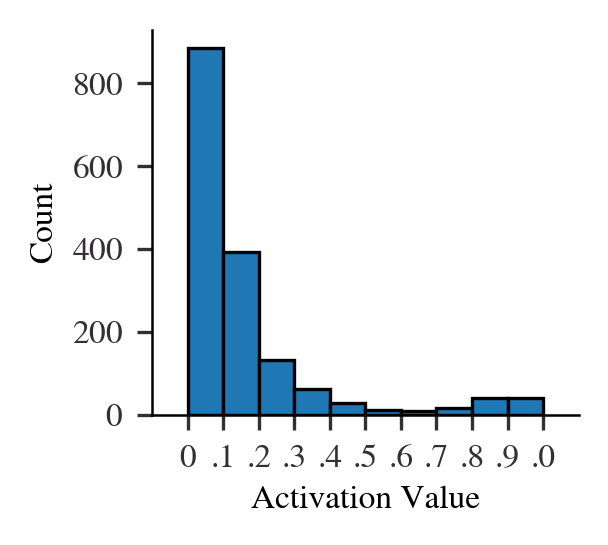

In [100]:
fig, ax = plt.subplots(figsize=(w, w / golden * 1.5))

xticks = np.arange(0, 1.01, 0.1)
hist, bins = np.histogram(probs[probs > 0.05], xticks)
# hist = hist / sum(hist)   # normalize
ax.bar(bins[:-1]+0.05, hist, width=0.1)

ax.set_xticks(xticks);
plt.xlim([-0.1, 1.1])
# plt.ylim([0,1])   # for normalized data
ax.set_xlabel('Activation Value')
ax.set_ylabel('Count')
ax.xaxis.set_major_formatter(FuncFormatter(lambda p,_ : f'{p:.1f}'[1:] if p != 0 else '0'))

fig.savefig('results/distribution.pdf', bbox_inches='tight', pad_inches=0)

## Histogram of Differences

In [101]:
import seaborn as sns
import numpy as np
from typing import Dict, Tuple
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter


plt.style.use('plt_style.txt')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

differences = np.load('results/differences.npy', allow_pickle=True).item()
differences = {loss : np.array(differences[(loss)]) for loss in differences}

In [102]:
for attack in ['fgsm', 'pgd']:
    m1, ms = differences[('l1', attack.lower())].mean(), differences[('selective', attack.lower())].mean()
    print(f'{attack}: -{(m1 - ms) / m1 * 100:.2f}%, {m1:.3f}, {ms:.3f}')

fgsm: -8.48%, 4.874, 4.461
pgd: -10.25%, 2.746, 2.464


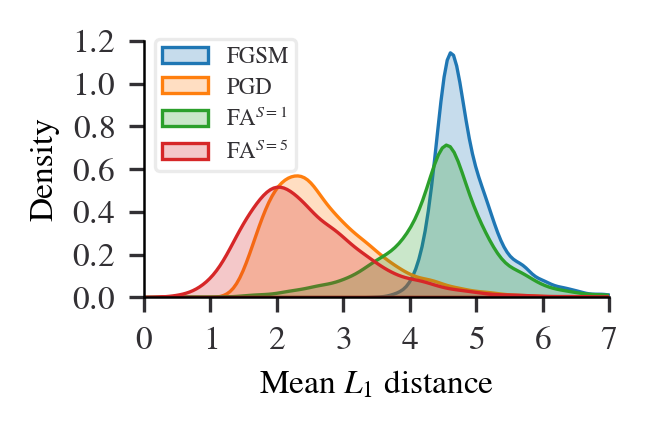

In [111]:
w = 5.5 / 2
fig, ax = plt.subplots(figsize=(2, w / golden / 1.5))
i = 0

for loss in ['l1', 'selective']:
    for attack in ['FGSM', 'PGD']:
        if loss == 'selective':
            name = f'FA$^{{S={1 if attack=="FGSM" else 5}}}$'
        else: 
            name = attack

        # model = f'S-{attack}' if loss == 'selective' else attack
        curr_ax = sns.kdeplot(differences[(loss, attack.lower())], ax=ax, label=name, shade=True)

        # # use these lines to add an average vertical line
        # curr_ax = sns.kdeplot(differences[(loss, attack.lower())], ax=ax, shade=False, fill=False)  # draw a second time to access data
        # ax.vlines(x=differences[(loss, attack.lower())].mean(), ymin=0, ymax=curr_ax.lines[i].get_ydata().max(), linestyles='dashed', color=colors[i])
        # i += 1


plt.xlabel('Mean $L_1$ distance')
plt.xlim([0, 7])
plt.xticks(np.arange(0, 7.1, 1))

plt.ylim([0, 1.2])
plt.yticks(np.arange(0, 1.21, 0.2))
# plt.legend(loc='upper left', ncol=1, fancybox=True, fontsize=5.5)
plt.legend(loc='upper left', bbox_to_anchor=(0.0, 1.05), ncol=1, fancybox=True, fontsize=5.5)
fig.savefig('results/differences.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

## Peak Signal to Noise Ratio

In [148]:
import os, cv2
import numpy as np
from tqdm.notebook import tqdm

mean = lambda x : sum(x) / len(x)

N = 1000
fnames = os.listdir('data/pascal/data')[:N]
PSNRs = []

epsilon = ['0.100', '0.020'][0]
model = ['frcnn', 'ssd300'][0]
loss = ['l1', 'selective'][1]
method = ['fgsm', 'pgd'][1]

for fname in tqdm(fnames):
    org = cv2.imread(f'data/pascal/data/{fname}', 1)
    clk = cv2.imread(f'C:/Users/tcilloni/Desktop/pascal_cloaked/{model}_{loss}_{method}_{epsilon}/data/{fname}', 1)
    psnr = cv2.PSNR(org, clk)
    PSNRs.append(psnr)

print(f'Mean PSNR: {mean(PSNRs):.2f}')

  0%|          | 0/1000 [00:00<?, ?it/s]

Mean PSNR: 29.55
